Задача: Расскрасить изображения (или видео)

- Подобрать размер с которым справится железо (будет ориентироваться на 128х128)
- Скачать цветные изображения, найти датасет
- Преобразовать цветные изображения в серые

In [50]:
class A:
    def __init__(self, y):
        self.y  =  y
        
    def  __call__(self,  x):
        return x**2 +  self.y
    
a =  A(2)
a(5)

27

In [1]:
import os
import numpy as np
from torchvision import transforms
from torchvision.io import read_image
from torchvision.utils import save_image


to_grey = transforms.Grayscale()

from PIL import Image

def greyscale(from_path, destination_path):
#    print(destination_path)
    good_image = True
    img = read_image(from_path)
    if img.shape[0] == 1:
        return False
    img = to_grey(img)[0] # [None, :, :, :]
    img = img.numpy()
#     print(img)
#     print(img.shape)
#     print(img.dtype)
    im = Image.fromarray(img)
    im.save(destination_path)
    # save_image(img, destination_path, nrow=1, normalize=True, value_range=(0,1))
    
# path = os.path.join('2024.01.12', 'archive', 'tiny-imagenet-200', 
#                     'train', 'n01882714', 'images')



In [2]:
#  im = Image.open("2024.01.12/archive/tiny-imagenet-200/train/n01983481/images/n01983481_15.JPEG")
# im = Image.open("2024.01.12/archive/tiny-imagenet-200/train/n04023962/images/n04023962_173.JPEG")
# np.array(im).shape

In [3]:
# 
# !ls 2024.01.12/

In [4]:
import os
from pathlib import Path
import shutil


base_dir = "2024.01.12"
source_dir = "source"
destination_dir = "archive/tiny-imagenet-200"
paths0 = ["train", "test", "val"]

In [5]:
# удаляем директорию которую собираемся заполнять
# if os.path.exists(os.path.join(base_dir, source_dir)):
#     shutil.rmtree(os.path.join(base_dir, source_dir))

# # создаем необходимую иеррархию папок
# for path0 in paths0:
#     Path(os.path.join(base_dir, source_dir, path0)).mkdir(parents=True, exist_ok=True)

# # преоразуем изображения в серый и сохраяем в source_dir
# k = 0
# max_iter = 9
# for path0 in paths0:
#     print(path0)
#     for root, dirs, files in os.walk(os.path.join(base_dir, destination_dir, path0)):
#         for file in files:
#             if file.split(".")[-1] == "JPEG":
#                 src = os.path.join(root, file)
#                 dst = os.path.join(base_dir, source_dir, path0, file)
#                 print(src, dst)
#                 greyscale(src, dst)
#                 k += 1
#             if k > max_iter:
#                 break
#         if k > max_iter:
#             break
#     if k > max_iter:
#         break

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.io import read_image
import matplotlib.pyplot as plt

# from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset

In [7]:
# class MyDataset(Dataset):
  
#     def __init__(self, X, y):
#         self.X = torch.Tensor(X)
#         self.y = torch.from_numpy(y).float()

#     def __len__(self):
#         return self.X.shape[0]
  
#     def __getitem__(self, index):
#         return (self.X[index], self.y[index])
    
    
class MyDataset(Dataset):
  
    def __init__(self, path_source, path_target):
        self.path_source = path_source
        self.path_target = path_target
        self.list_source_name  = os.listdir(self.path_source)

    def __len__(self):
        return len(self.list_source_name)
  
    def __getitem__(self, index):
        source_path = os.path.join(self.path_source,  self.list_source_name[index])
        target_path = os.path.join(self.path_target, 
                                   self.list_source_name[index].split("_")[0], 
                                   "images", 
                                   self.list_source_name[index])
        # print(source_path)
        # print(target_path)
        # target_img = Image.open(target_path)
        source_img = read_image(source_path)
        target_img  =  read_image(target_path)
        # source_img = numpy.array(Image.open(source_path))
        return source_img, target_img # , target_path)
        #  return (self.X[index], self.y[index])
    
# train_dataset = MyDataset(os.path.join(base_dir, source_dir, "train"), 
#                          os.path.join(base_dir, destination_dir, "train"))
# len(train_dataset)
# train_dataset[0]

In [8]:
# print("[INFO] loading the training and validation dataset...")
# trainDataset = ImageFolder(root=os.path.join(base_dir, source_dir, "train"))
# valDataset = ImageFolder(root=os.path.join(base_dir, source_dir, "val"))
# print("[INFO] training dataset contains {} samples...".format(
#         len(trainDataset)))
# print("[INFO] validation dataset contains {} samples...".format(
#         len(valDataset)))

In [9]:
train_dataset = MyDataset(os.path.join(base_dir, source_dir, "train"), 
                         os.path.join(base_dir, destination_dir, "train"))
val_dataset = MyDataset(os.path.join(base_dir, source_dir, "val"), 
                         os.path.join(base_dir, destination_dir, "val"))

In [10]:

def custom_collate_fn(batch):
    # Separate the input data and targets from the batch
    data, targets = zip(*batch)

    # Perform any preprocessing, padding, or other operations

    # Convert the data and targets to tensors
    data = torch.stack(data).to(torch.float)
#     for i, target in enumerate(targets):
#         print(i, target[0].shape, target[1])
#     print(type(targets))
    targets = torch.stack(targets).to(torch.float)

    # Return the batched data and targets
    return data, targets

In [11]:
BATCH_SIZE = 128*50
print("[INFO] creating training and validation set dataloaders...")
trainDataLoader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=custom_collate_fn)
valDataLoader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=custom_collate_fn)

[INFO] creating training and validation set dataloaders...


In [12]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()        
        # N, 1, 64, 64
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1), # -> N, 16, 32, 32
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1), # -> N, 32, 16, 16
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1), # -> N, 64, 8, 8
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=2, padding=1), # -> N, 128, 4, 4
            nn.ReLU(),
            nn.Conv2d(128, 256, 4) # -> N, 256, 1, 1
        )
        
        # N , 256, 1, 1
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 4), # -> N, 128, 4, 4
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1, output_padding=1), # N, 64, 8, 8
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1), # N, 32, 16, 16
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), # N, 16, 32, 32
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1), # N, 3, 64, 64  
            # nn.Sigmoid()
        )


    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [13]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [14]:
model = Autoencoder().to(device)

In [15]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=1e-3, 
                             weight_decay=1e-5)

In [16]:
num_epochs = 1000
outputs = []
for epoch in range(num_epochs):
    for (source_img, target_img) in trainDataLoader:
        # img = img.reshape(-1, 28*28) # -> use for Autoencoder_Linear
        source_img = source_img.to(device)
        target_img = target_img.to(device)

        recon = model(source_img)
        loss = criterion(recon, target_img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, source_img[0].to("cpu"), recon[0].to("cpu"), target_img[0].to("cpu")))

Epoch:1, Loss:11631.3262
Epoch:2, Loss:6915.5015
Epoch:3, Loss:5014.8052
Epoch:4, Loss:3902.7573
Epoch:5, Loss:3316.5830
Epoch:6, Loss:3141.3152
Epoch:7, Loss:2949.5630
Epoch:8, Loss:2800.3313
Epoch:9, Loss:2737.6343
Epoch:10, Loss:2712.7498
Epoch:11, Loss:2612.6880
Epoch:12, Loss:2529.5183
Epoch:13, Loss:2528.8752
Epoch:14, Loss:2486.8472
Epoch:15, Loss:2624.8315
Epoch:16, Loss:2430.7603
Epoch:17, Loss:2411.7292
Epoch:18, Loss:2374.2688
Epoch:19, Loss:2338.8176
Epoch:20, Loss:2288.6248
Epoch:21, Loss:2252.6182
Epoch:22, Loss:2294.6799
Epoch:23, Loss:2220.4661
Epoch:24, Loss:2225.3652
Epoch:25, Loss:2202.3691
Epoch:26, Loss:2134.1987
Epoch:27, Loss:2106.2031
Epoch:28, Loss:2073.1399
Epoch:29, Loss:2133.5120
Epoch:30, Loss:2047.0148
Epoch:31, Loss:2080.1580
Epoch:32, Loss:2013.8051
Epoch:33, Loss:1987.2002
Epoch:34, Loss:2054.4924
Epoch:35, Loss:2013.8506
Epoch:36, Loss:1968.5751
Epoch:37, Loss:2021.9161
Epoch:38, Loss:1930.0347
Epoch:39, Loss:1925.1978
Epoch:40, Loss:1956.2607
Epoch:41

In [ ]:
Epoch:1, Loss:17511.6582
Epoch:2, Loss:17603.8730
Epoch:3, Loss:17144.1797
Epoch:4, Loss:17077.1152
Epoch:5, Loss:17580.3066

In [ ]:
# del sigmoid, datetime, weightnn
Epoch:1, Loss:8376.0361
Epoch:2, Loss:4600.1479
Epoch:3, Loss:4152.0894
Epoch:4, Loss:3496.9219
Epoch:5, Loss:3262.8052

In [17]:
len(outputs)

5

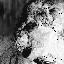

In [17]:
# outputs[-1][1].shape
transforms.ToPILImage()(outputs[-1][1])

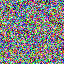

In [18]:
transforms.ToPILImage()(outputs[-1][2])

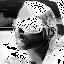

In [25]:
transforms.ToPILImage()(outputs[0][1][0])

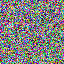

In [26]:
transforms.ToPILImage()(outputs[0][2][0])